In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition as skd
import matplotlib.pyplot as plt
import factor_analyzer
import scipy
%matplotlib inline

In [2]:
data =pd.read_csv('T0804.csv')
data.head()

,jpmorgan,citibank,wellsfargo,shell,exxon
0,0.013034,-0.007843,-0.003189,-0.044769,0.005215
1,0.008486,0.016689,-0.006210,0.011956,0.013489
2,-0.017915,-0.008639,0.010036,0.000000,-0.006143
3,0.021559,-0.003486,0.017435,-0.028592,-0.006953
4,0.010822,0.003717,-0.010134,0.029190,0.040975


In [3]:
data.shape

(103, 5)

In [4]:
Est_teste, pvalor = scipy.stats.shapiro(data)
print(f'A estatistica de teste observada é: {Est_teste}\nPvalor obersavado é: {pvalor}')

A estatistica de teste observada é: 0.994795560836792
Pvalor obersavado é: 0.07895462960004807


In [5]:
Est_teste, pvalor = factor_analyzer.calculate_bartlett_sphericity(data)
print(f'A estatistica de teste observada é: {Est_teste}\nPvalor obersavado é: {pvalor}')

A estatistica de teste observada é: 178.16390230819792
Pvalor obersavado é: 2.6922651055362945e-33


In [6]:
R = data.corr()
R

,jpmorgan,citibank,wellsfargo,shell,exxon
jpmorgan,1.000000,0.632288,0.510497,0.114602,0.154463
citibank,0.632288,1.000000,0.574142,0.322292,0.212675
wellsfargo,0.510497,0.574142,1.000000,0.182499,0.146207
shell,0.114602,0.322292,0.182499,1.000000,0.683378
exxon,0.154463,0.212675,0.146207,0.683378,1.000000


In [7]:
autovalor, autovetor = np.linalg.eig(R)
autovalor = np.sort(autovalor)[::-1] # Serve para botar em ordem decrescente.
autovalor

array([2.43727312, 1.40701266, 0.50051275, 0.40003159, 0.25516988])

Text(0, 0.5, 'Autovalor')

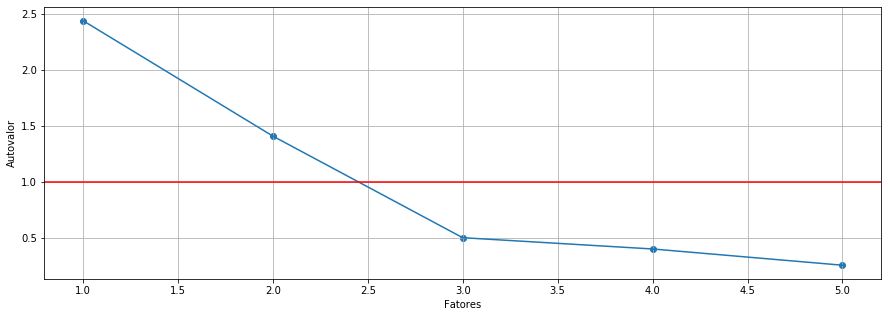

In [8]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.scatter(range(1,len(autovalor)+1), autovalor)
ax.plot(range(1,len(autovalor)+1), autovalor)
ax.axhline(y = 1, color = 'r')
ax.grid()
ax.set_xlabel('Fatores')
ax.set_ylabel('Autovalor')

In [16]:
fa = factor_analyzer.FactorAnalyzer(rotation=None, method = 'principal', n_factors=2)
fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=2, rotation=None,
               rotation_kwargs={}, use_smc=True)

In [17]:
fa.fit(data).loadings_

array([[ 0.73232184, -0.4365209 ],
       [ 0.83117912, -0.28048589],
       [ 0.72620221, -0.37385825],
       [ 0.60471551,  0.69395694],
       [ 0.56308847,  0.71864011]])

In [21]:
fa = factor_analyzer.FactorAnalyzer(rotation='varimax', method = 'principal', n_factors=2)
fa.fit(data)
fa.fit(data).loadings_

array([[0.85180934, 0.03558945],
       [0.84912047, 0.22028502],
       [0.81238485, 0.08467882],
       [0.12616672, 0.91177796],
       [0.07781876, 0.90964635]])